In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\bodyPerformance.csv")

In [3]:
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [4]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
df.describe().T

count        mean        std    min    25%    50%  \
age                      13393.0   36.775106  13.625639   21.0   25.0   32.0   
height_cm                13393.0  168.559807   8.426583  125.0  162.4  169.2   
weight_kg                13393.0   67.447316  11.949666   26.3   58.2   67.4   
body fat_%               13393.0   23.240165   7.256844    3.0   18.0   22.8   
diastolic                13393.0   78.796842  10.742033    0.0   71.0   79.0   
systolic                 13393.0  130.234817  14.713954    0.0  120.0  130.0   
gripForce                13393.0   36.963877  10.624864    0.0   27.5   37.9   
sit and bend forward_cm  13393.0   15.209268   8.456677  -25.0   10.9   16.2   
sit-ups counts           13393.0   39.771224  14.276698    0.0   30.0   41.0   
broad jump_cm            13393.0  190.129627  39.868000    0.0  162.0  193.0   

                           75%    max  
age                       48.0   64.0  
height_cm                174.8  193.8  
weight_kg                 75.3  138.1  
body fat_%                28.0   78.4  
diastolic                 86.0  156.2  
systolic                 141.0  201.0  
gripForce                 45.2   70.5  
sit and bend forward_cm   20.7  213.0  
sit-ups counts            50.0   80.0  
broad jump_cm            221.0  303.0

In [7]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

<Axes: >

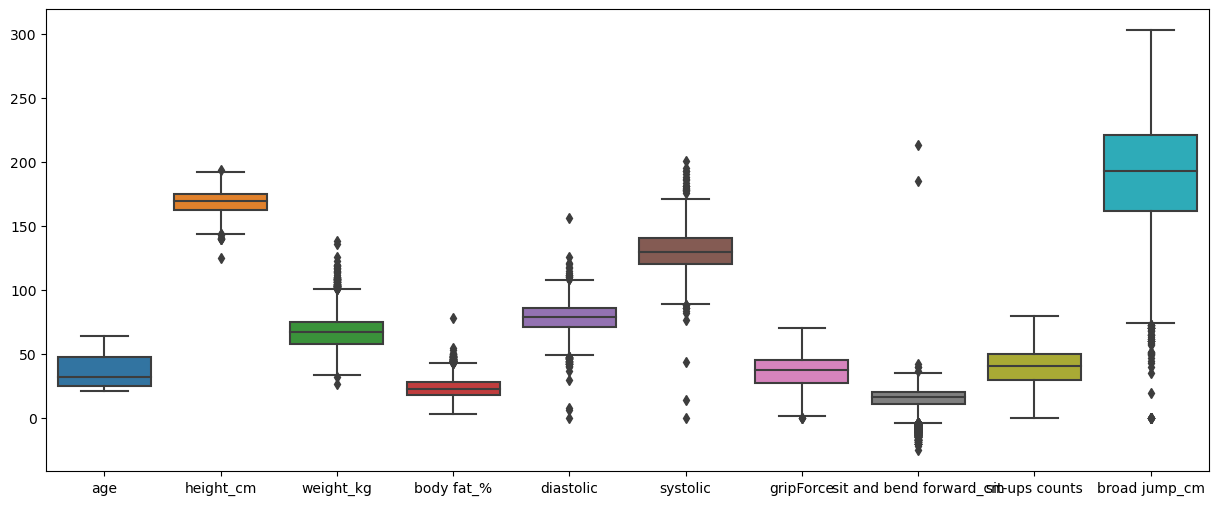

In [8]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

In [9]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [10]:
e1 = df[[col for col in df.columns if col in ['gender']]]

In [11]:
e1

gender
0          M
1          M
2          M
3          M
4          M
...      ...
13388      M
13389      M
13390      M
13391      F
13392      M

[13393 rows x 1 columns]

In [12]:
e2 = df[[col for col in df.columns if col in ['class']]]

In [13]:
e2

class
0         C
1         A
2         C
3         B
4         B
...     ...
13388     C
13389     D
13390     A
13391     D
13392     C

[13393 rows x 1 columns]

In [14]:
ob = OrdinalEncoder(categories=[['M', 'F']])

In [15]:
ob.fit(e1)

OrdinalEncoder(categories=[['M', 'F']])

In [16]:
e1_gen = pd.DataFrame(ob.transform(e1),columns=['en_Gen'])

In [17]:
e1_gen

en_Gen
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
13388     0.0
13389     0.0
13390     0.0
13391     1.0
13392     0.0

[13393 rows x 1 columns]

In [18]:
ol = LabelEncoder()

In [19]:
ol.fit(e2)

C:\Users\tsd95\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [20]:
e2_class = pd.DataFrame(ol.transform(e2),columns=['en_Class'])

C:\Users\tsd95\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [21]:
e2_class

en_Class
0             2
1             0
2             2
3             1
4             1
...         ...
13388         2
13389         3
13390         0
13391         3
13392         2

[13393 rows x 1 columns]

In [22]:
Chi_sq,P_Val = chi2(e1_gen,e2_class)
print(Chi_sq)
print(P_Val)

[71.29464739]
[2.25424346e-15]


In [23]:
P_Val = np.around(P_Val,5)

In [24]:
P_Val

array([0.])

In [25]:
dfSq = pd.DataFrame({'features':e1_gen.columns,'Chi':Chi_sq,'P_val':P_Val})

In [26]:
dfSq

features        Chi  P_val
0   en_Gen  71.294647    0.0

In [27]:
df=pd.concat([df,e2_class],axis=1)

In [28]:
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

      class  en_Class  
0         C         2  
1         A         0  
2         C         2  
3         B         1  
4         B         1  
...     ...       ...  
13388     C         2  
13389     D         3  
13390     A         0  
13391     D         3  
13392     C         2  

[13393 rows x 13 columns]

C:\Users\tsd95\AppData\Local\Temp\ipykernel_14740\1426671555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

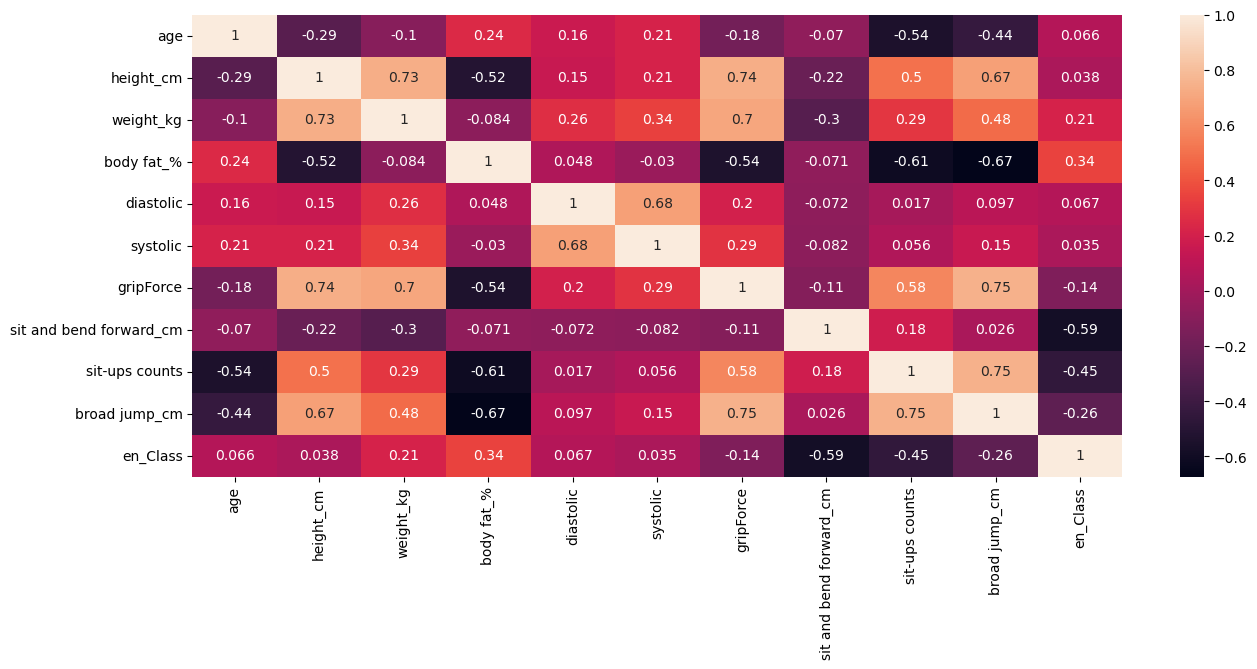

In [29]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

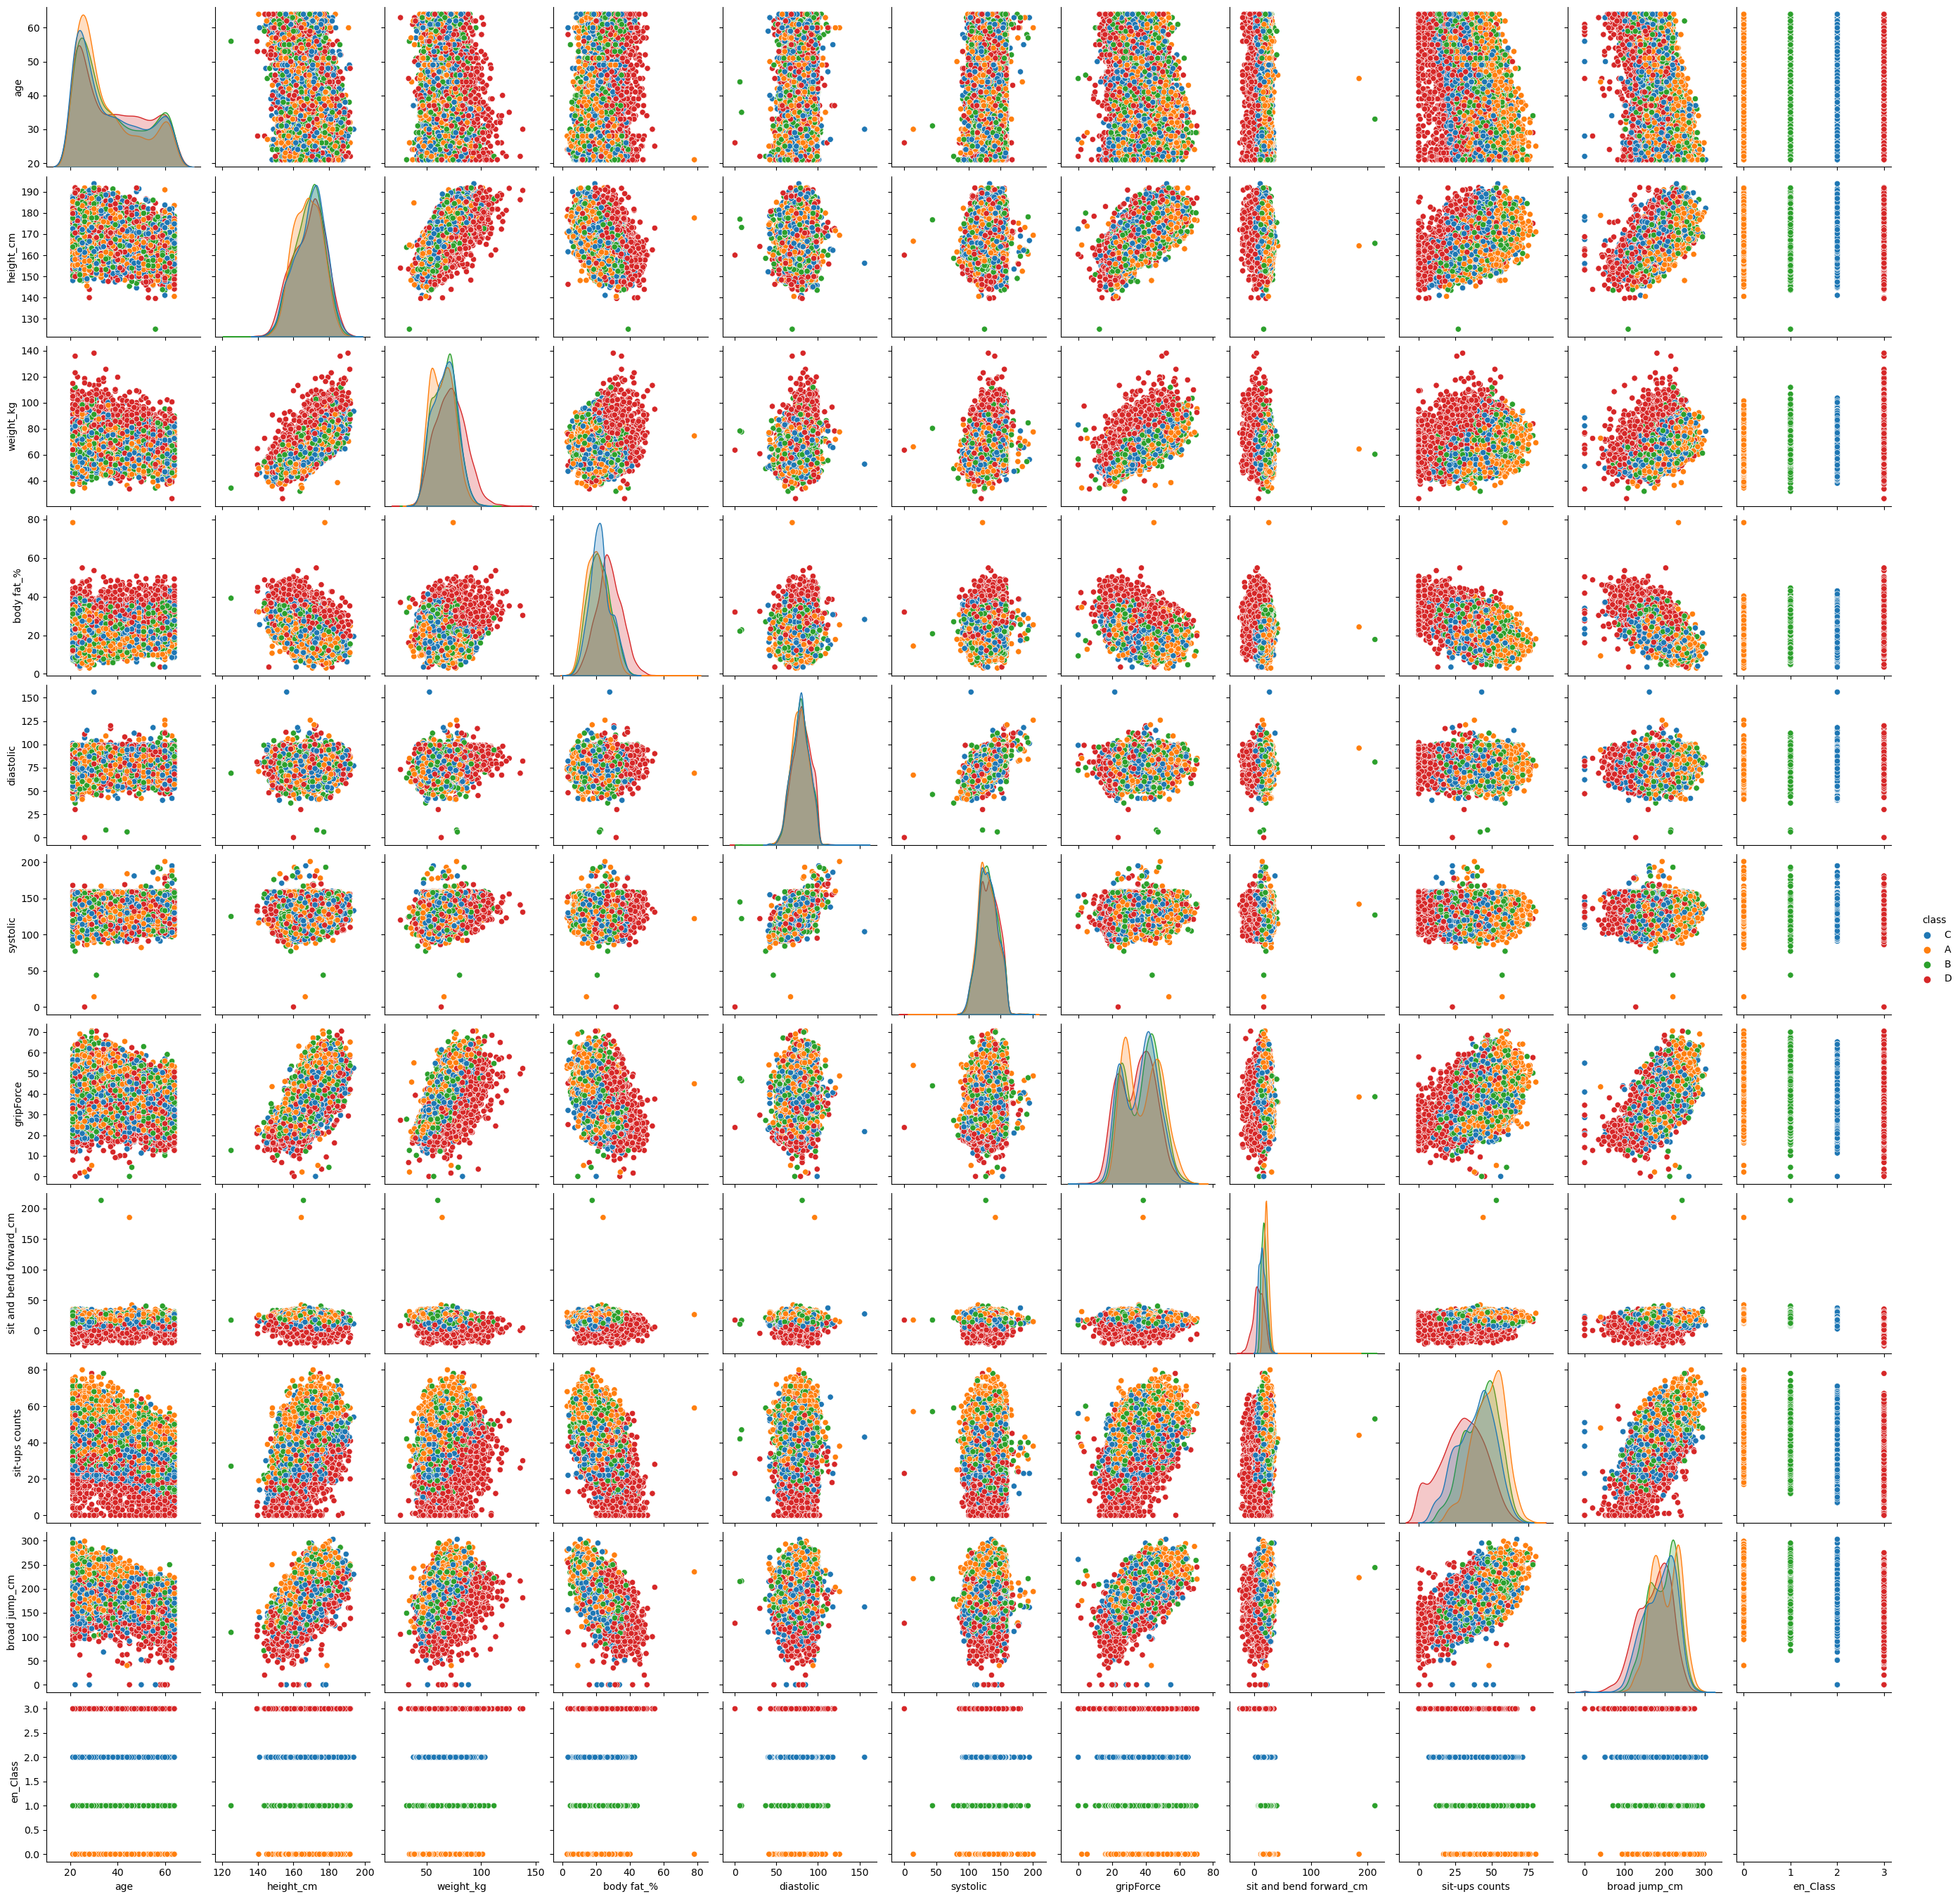

In [30]:
sns.pairplot(data=df,hue='class')

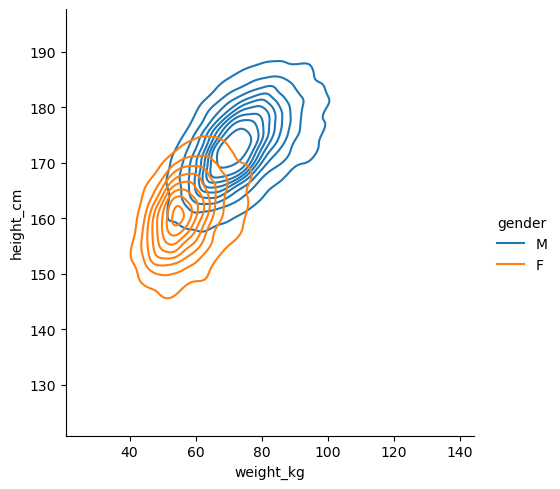

In [31]:
sns.displot(df, x="weight_kg", y="height_cm", hue="gender", kind="kde")

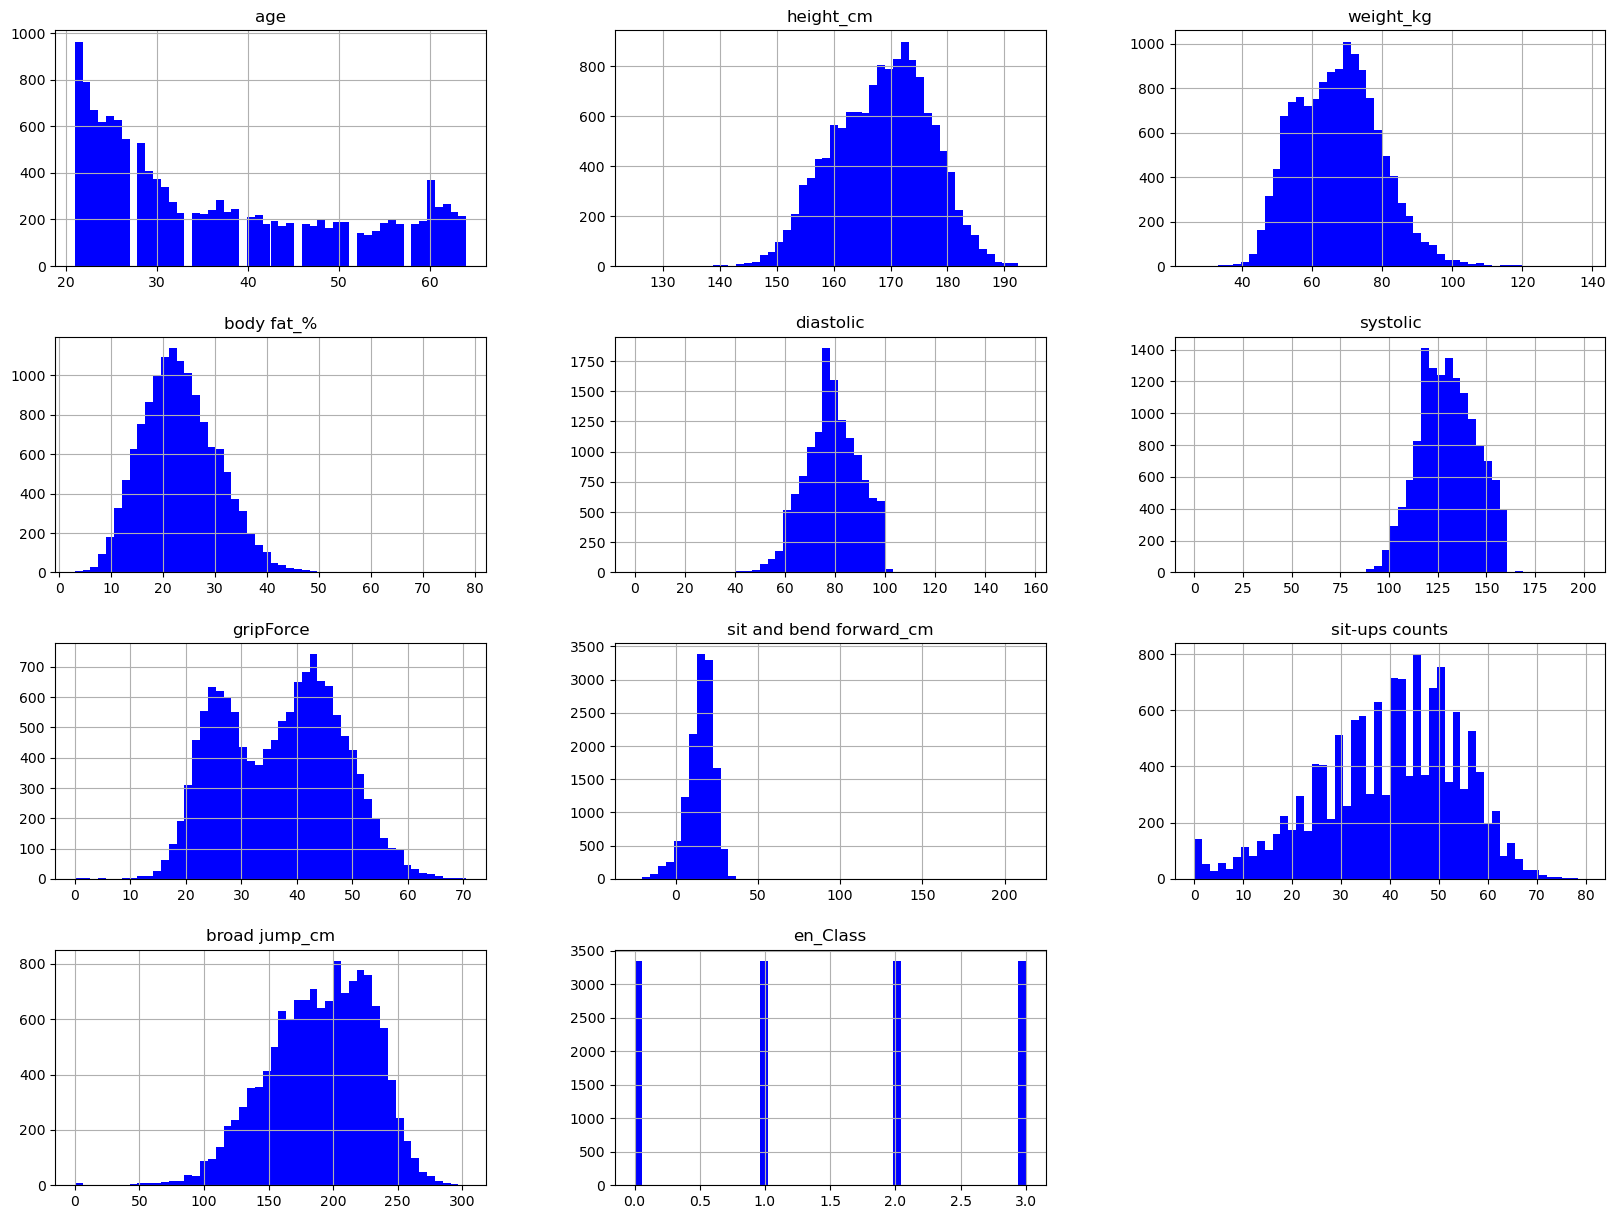

In [32]:
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

In [33]:
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

      class  en_Class  
0         C         2  
1         A         0  
2         C         2  
3         B         1  
4         B         1  
...     ...       ...  
13388     C         2  
13389     D         3  
13390     A         0  
13391     D         3  
13392     C         2  

[13393 rows x 13 columns]

In [34]:
def BMI (row):
    bmi = ((row.weight_kg/row.height_cm)/row.height_cm)*10000
    if bmi>=18.5 and bmi < 25: 
        return 0 
    elif bmi < 18.5:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    else:
        return 4

In [35]:
df['BMI']=df.apply(BMI,axis=1)

In [36]:
df.drop(['age', 'gender', 'height_cm', 'weight_kg','diastolic','systolic', 'class'],axis=1,inplace=True)

In [37]:
df

body fat_%  gripForce  sit and bend forward_cm  sit-ups counts  \
0            21.3       54.9                     18.4            60.0   
1            15.7       36.4                     16.3            53.0   
2            20.1       44.8                     12.0            49.0   
3            18.4       41.4                     15.2            53.0   
4            17.1       43.5                     27.1            45.0   
...           ...        ...                      ...             ...   
13388        16.2       35.8                     17.4            47.0   
13389        12.1       33.0                      1.1            48.0   
13390        20.1       63.5                     16.4            45.0   
13391        40.4       19.3                      9.2             0.0   
13392        19.5       35.9                      7.1            51.0   

       broad jump_cm  en_Class  BMI  
0              217.0         2    2  
1              229.0         0    0  
2              181.0         2    0  
3              219.0         1    0  
4              217.0         1    0  
...              ...       ...  ...  
13388          198.0         2    0  
13389          167.0         3    0  
13390          229.0         0    2  
13391           75.0         3    2  
13392          180.0         2    0  

[13393 rows x 7 columns]

<Axes: >

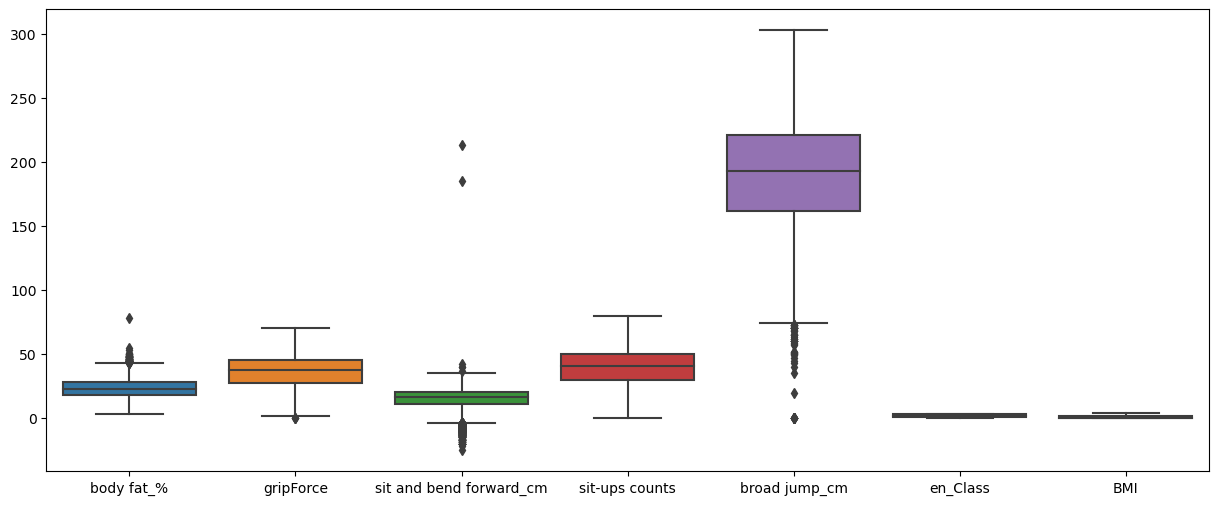

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

In [39]:
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        q1 = df['sit and bend forward_cm'].quantile(0.25)
        q3 = df['sit and bend forward_cm'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df['sit and bend forward_cm'] >= lower_bound) & (df['sit and bend forward_cm'] <= upper_bound)]
    return df

In [40]:
df = remove_outliers(df,df['sit and bend forward_cm'])

In [41]:
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        q1 = df['body fat_%'].quantile(0.25)
        q3 = df['body fat_%'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df['body fat_%'] >= lower_bound) & (df['body fat_%'] <= upper_bound)]
    return df

In [42]:
df = remove_outliers(df,df['body fat_%'])

In [43]:
X = df[[col for col in df.columns if col not in ['en_Class']]]

In [44]:
X

body fat_%  gripForce  sit and bend forward_cm  sit-ups counts  \
0            21.3       54.9                     18.4            60.0   
1            15.7       36.4                     16.3            53.0   
2            20.1       44.8                     12.0            49.0   
3            18.4       41.4                     15.2            53.0   
4            17.1       43.5                     27.1            45.0   
...           ...        ...                      ...             ...   
13388        16.2       35.8                     17.4            47.0   
13389        12.1       33.0                      1.1            48.0   
13390        20.1       63.5                     16.4            45.0   
13391        40.4       19.3                      9.2             0.0   
13392        19.5       35.9                      7.1            51.0   

       broad jump_cm  BMI  
0              217.0    2  
1              229.0    0  
2              181.0    0  
3              219.0    0  
4              217.0    0  
...              ...  ...  
13388          198.0    0  
13389          167.0    0  
13390          229.0    2  
13391           75.0    2  
13392          180.0    0  

[12809 rows x 6 columns]

In [45]:
y = df['en_Class']

In [46]:
y

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: en_Class, Length: 12809, dtype: int32

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [48]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (8966, 6)
Size_of X_test (3843, 6)
Size_of y_train (8966,)
Size_of y_test (3843,)


In [50]:
le = LogisticRegression()

In [51]:
model = le.fit(X_train,y_train)

C:\Users\tsd95\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
yPred = model.predict(X_test)

In [53]:
yPred

array([0, 3, 0, ..., 2, 1, 0])

In [54]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       0.60      0.67      0.64      1025
           1       0.34      0.33      0.34      1004
           2       0.46      0.41      0.44       973
           3       0.68      0.69      0.68       841

    accuracy                           0.52      3843
   macro avg       0.52      0.53      0.52      3843
weighted avg       0.52      0.52      0.52      3843

